# Simple linear regression
Simple linear regression occurs when only two variables are used, one dependent and one independent.

In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [2]:
%cd '/content/Drive/MyDrive/Colab Notebooks/MachineLearning/Models/LinearRegression/Linear Example Advanced/Simple Linear Regression'
!ls

/content/Drive/MyDrive/Colab Notebooks/MachineLearning/Models/LinearRegression/Linear Example Advanced/Simple Linear Regression
 SimpleData.csv  'SimpleRegression -eng.ipynb'	 SimpleRegression.ipynb


## Importing the necessary libraries
The following libraries are imported:
- numpy: For handling arrays efficiently.
- pandas: For managing data in the form of a DataFrame, similar to excel.
- matplotlib.pyplot: To make graphs.
- statmodels: To perform the linear regression model.
- seaborn: To style matplotlib plots.
- tabulate: To draw tables with the data.

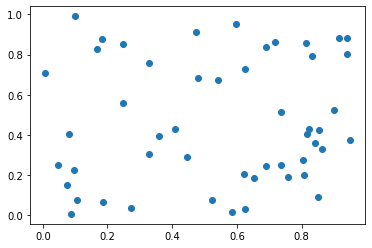

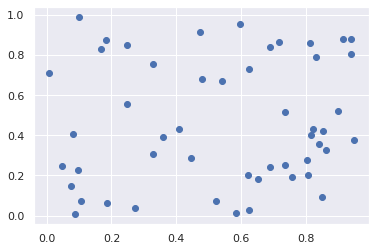

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from tabulate import tabulate

x = np.random.rand(50)
y = np.random.rand(50)

# Without seaborn styling

plt.scatter(x, y)
plt.show()

# with the stylized

sns.set()

plt.scatter(x, y)
plt.show()

## Loading Data

In [4]:
data = pd.read_csv('SimpleData.csv')

Something important is that when the data is automatically loaded, it is loaded in the form of a DataFrame.

This DataFrame contains two main columns, which are **SAT** and **GPA**:
- **"SAT score"**: Contains **"reading comprehension"**, **"math"** and **"Writing"**.
- **"GPA"**: **Grade point average**, obtained upon completion of university.

In [5]:
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


# Creating the regression

## Defining the dependent and independent variable
Since one **(SAT)** is the score in critical areas and the other**(GPA)** is the score at the end of college, it makes sense that there is a relationship between the two, so we define **GPA** as the dependent variable and **SAT** as the independent variable.

In [7]:
y = data ['GPA']
x1 = data ['SAT']

## Exploring the data
We can see the relationship between both variables in a scatter plot and we can also get an idea of the relationship with a correlation and a heat map.

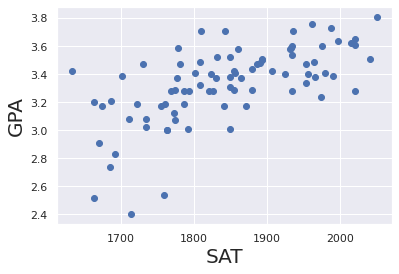

In [8]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [9]:
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


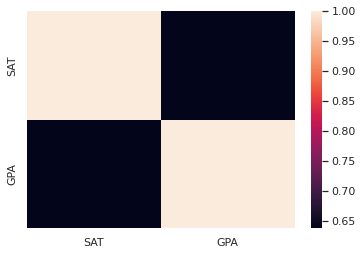

In [10]:
sns.heatmap(data.corr())
plt.show()

A relationship of **0.637184** is close to 1, which means that there is a relationship between both variables, although according to the correlation it is not very strong.

## Regression - statsmodels
There are several libraries in python to be able to implement a linear regression, in this case the **"statmodels"** package will be used.


In [11]:
# We are going to review the independent variable, to carry out the regression model with it.
print(x1)

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64


In [12]:
# This is the first example of linear regression, which within the statmodels package is misused.
# So this example is wrong

results = sm.OLS(y,x1).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                   9.38e-102
Time:                        21:07:29   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

When using the **statmodels** package, it is necessary to add a constant for computational reasons. Thus, the example carried out correctly is the following.

In [13]:
# The add_constant function is used to be able to do the regression correctly
x = sm.add_constant(x1)
print(x)

    const   SAT
0     1.0  1714
1     1.0  1664
2     1.0  1760
3     1.0  1685
4     1.0  1693
..    ...   ...
79    1.0  1936
80    1.0  1810
81    1.0  1987
82    1.0  1962
83    1.0  2050

[84 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


At this point it is very necessary to review the statistics, which are very different from those of the previous example, in addition to the fact that this time there is an intercept, which is in the **const**.

In [14]:
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           7.20e-11
Time:                        21:07:29   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.5

## graphing
Linear regression has a linear representation which is given by the line formula: $$y=intercept + x(coef)$$
In this way it would be: $$y = 0.275 + x1(0.0017)$$

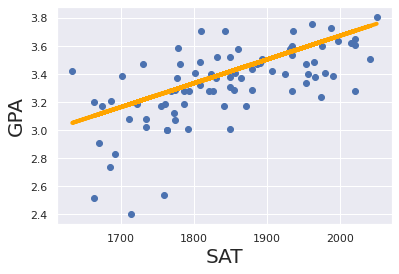

In [15]:
# Plot scatterplot
plt.scatter(x1,y)
# Store the formula of the line into a variable
yhat = 0.275 + 0.0017*x1
# Graph the line
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label X,Y
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# show the graph
plt.show()

# Comparison between statmodels and sklearn
**Sklearn** is one of the most used packages for machine learning, so it is necessary to compare the answers obtained with the **statmodels** package to see if they are the same.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

lin = LinearRegression()
reg = lin.fit(data[['SAT']], data['GPA'])
r = lin.score(data[['SAT']], data['GPA'])
f, p = f_regression(data[['SAT']], data['GPA'])
# To give better order it is put inside a dictionary.
# The coef_ attribute returns a list so that, being a simple regression, only the first element is chosen.
# All are placed in list form to facilitate the use of tabulate.
skStats = {'SAT-coef': [reg.coef_[0]], 'intercepto': [reg.intercept_], 'r-cuadrado': [r], 'f': [f], 'p':[p]}
# Plot the statistics in a table with the tabulate package
print(tabulate(skStats, tablefmt='fancy_grid', headers=skStats.keys(), showindex=['Estaditicos']))

╒═════════════╤════════════╤══════════════╤══════════════╤════════╤═════════════╕
│             │   SAT-coef │   intercepto │   r-cuadrado │      f │           p │
╞═════════════╪════════════╪══════════════╪══════════════╪════════╪═════════════╡
│ Estaditicos │ 0.00165569 │      0.27504 │     0.406004 │ 56.048 │ 7.19952e-11 │
╘═════════════╧════════════╧══════════════╧══════════════╧════════╧═════════════╛


## Comparison
First you have to observe the result obtained with the package **"statmodels"**

```
  OLS Regression Results
==================================================== ============================
Dept. Variable: GPA R-squared: 0.406
Model: OLS Adj. R-squared: 0.399
Method: Least Squares F-statistic: 56.05
Date: Sun, 23 Jan 2022 Prob (F-statistic): 7.20e-11
Time: 17:50:44 Log-Likelihood: 12,672
No. Observations: 84 AIC: -21.34
Df Residuals: 82 BIC: -16.48
DfModel: 1
Covariance Type: nonrobust
==================================================== ============================
                  coef std err t P>|t| [0.025 0.975]
-------------------------------------------------- ----------------------------
const 0.2750 0.409 0.673 0.503 -0.538 1.088
SAT 0.0017 0.000 7.487 0.000 0.001 0.002
==================================================== ============================
Bus: 12,839 Durbin-Watson: 0,950
Prob(Omnibus): 0.002 Jarque-Bera (JB): 16.155
Skew: -0.722 Prob(JB): 0.000310
Kurtosis: 4,590 Cond. No. 3.29e+04
==================================================== ============================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

```

There are 5 main statistics to review:
- The intercept: 0.2750
- The coefficient of **SAT**: 0.0017
- R²: 0.406
- F: 56.05
- F(p): 7.20e-11

Now with sklearn:
```
╒‖ATAs........ explain ═══════╤════════╤═════════════╕
│ │ SAT-coef │ intercept │ r-squared │ f │ p │
╞‖ATAs........ explain ═══════╪════════╪═════════════╡
│ Statistics │ 0.00165569 │ 0.27504 │ 0.406004 │ 56.048 │ 7.19952e-11 │
╘‖ATAs........ explain ═══════╧════════╧═════════════╛
```
- The intercept: 0.2750402996602799
- The coefficient of **SAT**: 0.00165569
- R²: 0.40600391479679754
- F: 56.048
-F(p): 7.19952e-11

The only differences are that statmodels generates simplified statistics, rounding decimal places, which makes it more readable but less accurate than sklearn.

# Understanding the statistics
The **statmodels** library gives us a large number of statistics, which must be looked at very carefully because they reveal many important things on top of the statistics seen above.

## Intercept

```
==================================================== ============================
                  coef
-------------------------------------------------- ----------------------------
const 0.2750
```
Before seen the formula of the straight line has the following form:
$$y = intercept + x(coefficient)$$
So that the intercept is the point from where the line starts, in the following example you see an **intercept** of 5, because that is where the line begins.

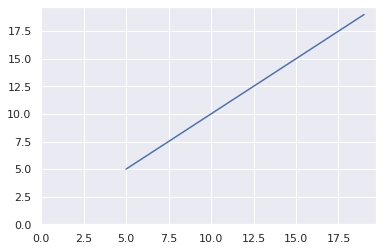

In [17]:
xInt = np.arange(5, 20)
yInt = np.arange(5, 20)

plt.plot(xInt, yInt)
plt.ylim(0)
plt.xlim(0)
plt.show()

## Coefficient

The coefficient or coefficients, depending on whether the regression is simple (a single coefficient) or compound (many coefficients), are the amount that increases by **y** for each number that increases by **x**, thus the coefficient is better known as the slope.

```
==================================================== ============================
                  coef
-------------------------------------------------- ----------------------------
SAT 0.0017
==================================================== ============================
```
Let's imagine that we have a product that sells for two units for every dollar invested in advertising, according to the example:
$$pending = 2$$
$$intercept = 0$$

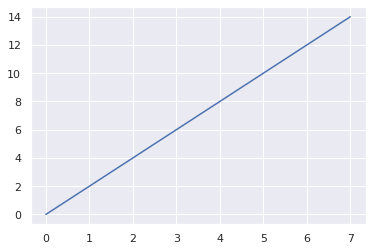

In [18]:
yCoef = np.arange(0, 15, 2)
xCoef = np.arange(0, 8, 1)
plt.plot(xCoef, yCoef)
plt.show()

## R squared
R squared is one of the most used indices to determine accuracy and linearity, its precision is measured from 0 to 1.

```
|
|
|
|___________________
|
|
|___________________
```
In this case there is a horizontal line, here there is no relationship, so surely **r squared** will be 0, in any other case its value will oscillate between 0 and 1, one way to obtain a horizontal line is through the mean

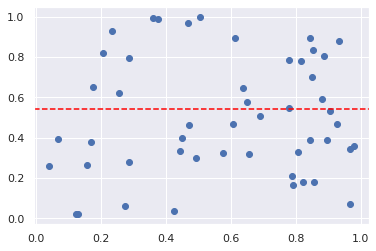

In [19]:
xr = np.random.rand(50)
yr = np.random.rand(50)
datar = np.append(xr, yr)
meanr = np.mean(datar)
plt.scatter(xr, yr)
plt.axhline(meanr, color='red', linestyle='--')
plt.show()

Here there is a horizontal line that indicates that there is no relationship, in this way to obtain **r squared** the following formula is used:

$$r^2=\frac{var(mean)-var(fit)}{var(mean)}$$

- var(mean) represents the variance of the data with respect to the mean.

$$var(mean) = \frac{\sum{(data-mean)^2}}{n}$$

$$n = \text{number of data items}$$

- var(fit) represents the variance of the data with respect to the line made, through its value in the line of the linear regression.

$$var(fit)=\frac{\sum{(data-line)^2}}{n}$$

$$n = \text{number of data items}$$

In this way, if the variance with respect to the line is very large, assimilating the line of the mean:

$$r^2 = 0$$

But if it is very small assimilating to the regression line:

$$r^2 = 1$$

```
  OLS Regression Results
==================================================== ============================
R-squared: 0.406
==================================================== ============================
```

The value of the image shows that with our model we can explain little more than 40% of the results.

## F-statistic
The **F** statistic is used to know if the model works, this statistic works using **p** values, in the graph the **p** value is given by **Prob (F-statistic)* *

```
==================================================== ============================
R-squared: 0.406
F-statistic: 56.05
Prob (F-statistic): 7.20e-11
==================================================== ============================
```
In order to understand these **p** values, it is necessary to understand the existence of the alternate hypothesis and the null hypothesis, which in this case are already predefined:
- **H0**: The model performs the same way without independent variables as with them, in other words the independent variables are not necessary and the intercept is the only thing that really matters.
- **H1**: The model performs better with the independent variables since only the intercept is not enough.

According to the example we have that **Prob (F-statistic) = 7.20e-11** we must remember that this is the same as **P = 7.20e-11**, this is easier to understand from the following way:

```
print(format(7.19952e-11, '.17f'))
0.00000000007199520
```
Since this is much less than 0.05, it is possible to **accept the alternative hypothesis (H1)** and define that the model performs better using the independent variable **SAT**.

To better understand this concept it is good to review this [video](https://youtu.be/nk2CQITm_eo)

## standard error
This is an extremely interesting concept, this is closely related to the **standard deviation**, since the standard deviation formula is used to find the distance between data, here we use **y(real)* * y **y(estimated)** to subsequently apply the following formula:
$$stderr = \sqrt{\frac{\sum{(y(estimated)-y(actual))^²}}{n-2}}$$
Where:
- y(estimated) is the **y** value predicted by the line.
- y(real) is the actual **y** value of the sample.
- n is the number of the sample and something important is to subtract 2, because it is about two variables of a sample, but not of the total population.

```
==================================================== ============================
                  coef std err
-------------------------------------------------- ----------------------------
const 0.2750 0.409
SAT 0.0017 0.000
==================================================== ============================
```

Intuitively, the **standard error consists of taking the standard deviation from the subtraction of the predicted values and the real values**, then it is the mean of the differences between the predicted and real values, **the closer to 0* * More accuracy in predictions. [For more information see the following link](https://youtu.be/r-txC-dpI-E)

## t-statistic
It is possible to obtain a **t** statistic from the regression line, for this **n-2** degrees of freedom are used and a two-tailed analysis is performed.
The following formula is used:
$$t = \frac{B - \hat{B}}{stderr}$$
- B is the coefficient.
- $\hat{B}$, the value that subtracts from B is equal to 0.
- stderr is the standard error.

```
==================================================== ============================
                  coef std err t P>|t|
-------------------------------------------------- ----------------------------
const 0.2750 0.409 0.673 0.503
SAT 0.0017 0.000 7.487 0.000
==================================================== ============================
```

It is possible to obtain the result manually:

$$t=\frac{0.2750-0}{0.409} = 0.503$$

Once the **t** value is obtained, it is possible to obtain the **p** values within the curve:

```
from scipy.stats import t

student = t(82)
p = student.sf(0.673) * 2
print(p)
0.5028395923141211
```

This rounded value is **0.503** and something important is to multiply the result by 2 since it is a two-tailed analysis.

Now based on this it is necessary to apply the hypotheses:

- **H0(null hypothesis)**: The slope of the variable is equal to 0.
- **H1(Alternate hypothesis)**: The slope is different from 0.

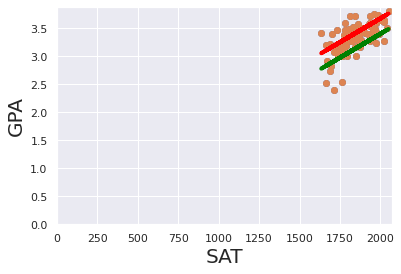

In [20]:
plt.scatter(x1,y)
plt.scatter(x1,y)
# The line according to the regression model
yhat = 0.275 + 0.0017*x1
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
# The same graph but taking the intercept to 0
yhat = 0.0017*x1 + 0
fig = plt.plot(x1,yhat, lw=4, c='green', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.xlim(0)
plt.ylim(0)
plt.show()

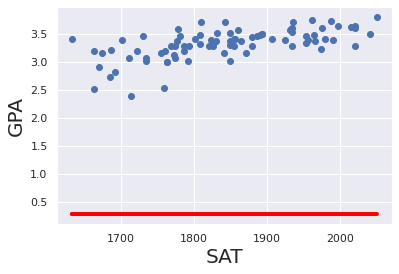

In [21]:
# The same graph but playing with coef equaling it to 0 (There is no relationship)
plt.scatter(x1,y)
yhat = 0*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()